In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# df = pd.read_csv('with_author_details.csv')
# df['author_type'] = df.author_type.apply(lambda x: 1 if x=='User' else 0)
# df = df.astype('int')
df = pd.read_csv('1000random.csv')
print(df.shape)
df.describe().transpose()


(1000, 24)


,count,mean,std,min,25%,50%,75%,max
stars,1000.0,39561.415,32451.052917,20578.0,23556.25,29062.5,42029.75,367165.0
size,1000.0,199226.340,846638.455504,0.0,5786.00,28333.0,126320.50,20994814.0
forks_count,1000.0,7397.526,9300.397495,391.0,2625.75,4660.0,8277.50,88367.0
open_issues,1000.0,574.623,1451.955884,0.0,49.00,182.0,515.50,24417.0
num_topics,1000.0,7.240,5.727233,0.0,3.00,6.0,10.00,20.0
desc_word_count,1000.0,10.263,9.005383,0.0,5.00,8.0,13.00,168.0
created_at,1000.0,402326.815,27033.366489,335520.0,384131.00,401811.5,421798.75,467503.0
updated_at,1000.0,467980.700,6.621620,467883.0,467981.00,467982.0,467983.00,467983.0
pushed_at,1000.0,467176.769,2519.933003,437595.0,467540.75,467912.0,467977.00,467983.0
has_homepage,1000.0,0.717,0.450682,0.0,0.00,1.0,1.00,1.0


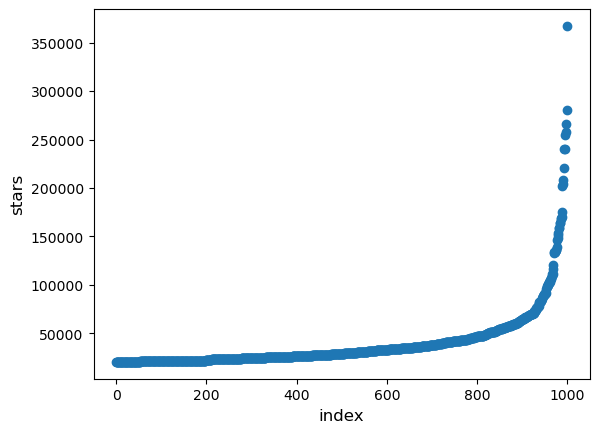

In [3]:
def plot_feature(df, col):
    plt.scatter(range(df.shape[0]), np.sort(df[col].values))
    plt.xlabel('index', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

plot_feature(df, "stars")


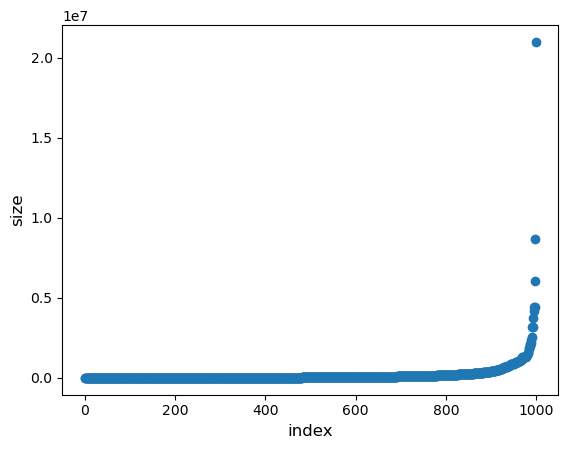

In [4]:
plot_feature(df, "size")

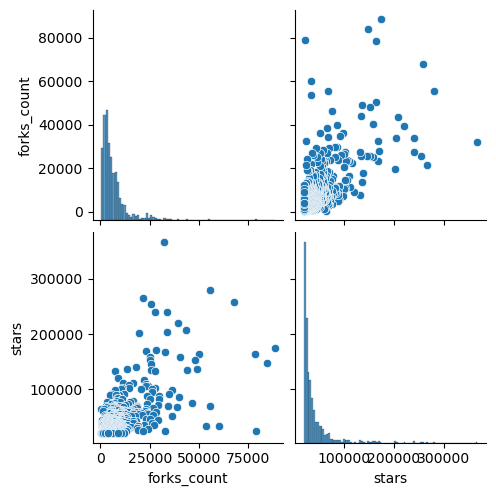

In [6]:
import seaborn as sns

df1 = pd.DataFrame()
df1['forks_count'] = df['forks_count']
df1['stars'] = df['stars']
sns.pairplot(df1)


In [16]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("1000random.csv")
X = df.drop(['stars'], axis=1)
y = df['stars']


# create a base classifier used to evaluate a subset of attributes
model = RandomForestRegressor(n_jobs=-1, n_estimators=200, verbose=1, random_state=42)

# create the RFE model and select amount of features
rfe = RFE(model, n_features_to_select=20)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
#print(rfe.feature_names_in_)


df = pd.read_csv("1000random.csv")
df2 = df.drop(['stars'], axis=1)
n = 0
lis = df2.columns
for i in list(lis):
    if rfe.support_[n] == False:
        df2 = df2.drop([i],axis=1)
        n+=1
    else:
        n+=1
        
Cla = df['stars']


df2['stars'] = Cla
df2.to_csv('1000random_updated.csv')


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1

[ True  True  True  True  True False  True  True False  True False False
  True  True  True  True  True False  True False False False  True]
[1 1 1 1 1 8 1 1 3 1 6 9 1 1 1 1 1 4 1 7 5 2 1]


[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


0                size
16          pushed_at
15         updated_at
14         created_at
13    desc_word_count
7          num_topics
22     remain_license
2         open_issues
1         forks_count
6        has_projects
4           has_pages
3            has_wiki
9          typescript
18        mit_license
12     other_language
21      other_license
8          javascript
17       has_homepage
20     apache_license
10             python
19        nan_license
5          has_issues
11               rust
Name: Features, dtype: object


<Axes: xlabel='Ranking', ylabel='Features'>

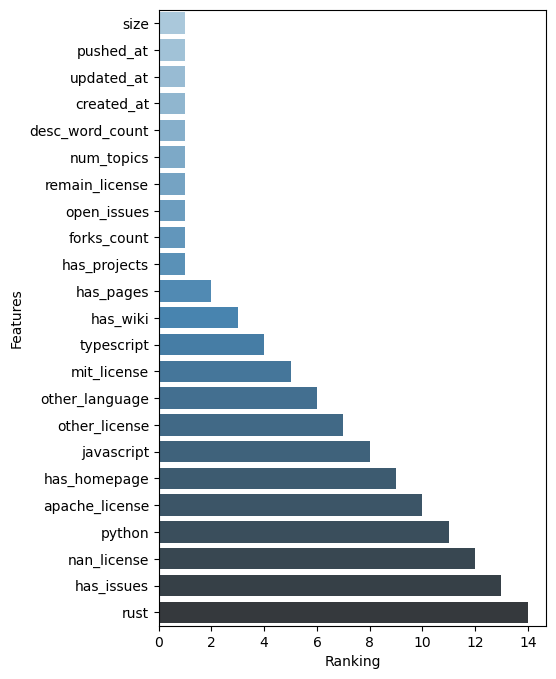

In [14]:
import seaborn as sns
Ranking = rfe.ranking_
Features = rfe.feature_names_in_
df = pd.DataFrame({"Features":Features,"Ranking":Ranking})
orders=df.sort_values('Ranking').Features
print(orders)

plt.figure(figsize=(5,8))
sns.barplot(x='Ranking', y="Features", data=df, order=df.sort_values('Ranking').Features, palette="Blues_d")

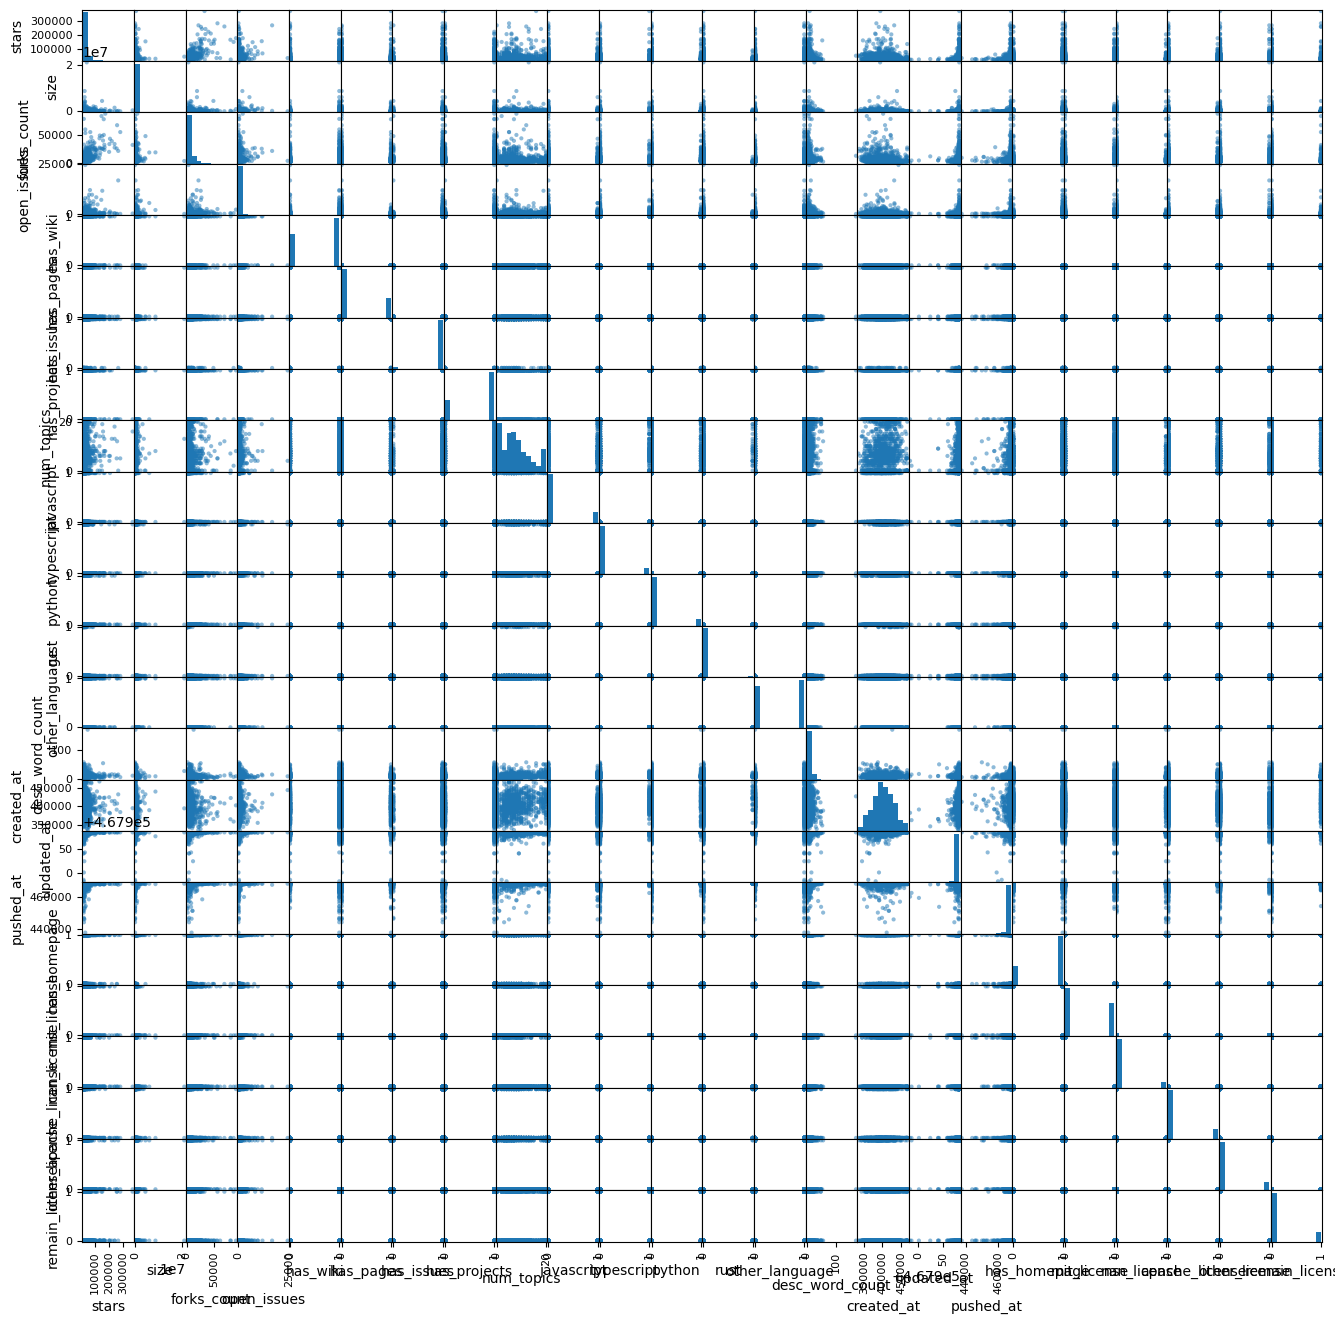

In [9]:
#df = pd.read_csv('with_author_details.csv')
#df['author_type'] = df.author_type.apply(lambda x: 1 if x=='User' else 0)
#
df = pd.read_csv('1000random.csv')
df = df.astype('int')
pd.plotting.scatter_matrix(df,figsize=(16,16));


      Iter       Train Loss   Remaining Time 
         1   890785465.1014            0.74s
         2   800933910.2208            0.86s
         3   722357522.2207            0.82s
         4   660414491.7927            0.80s
         5   606471663.3917            0.79s
         6   563112252.2598            0.73s
         7   525510251.2077            0.77s
         8   494301224.0808            0.73s
         9   468007244.5247            0.73s
        10   445717339.1851            0.73s
        20   312008529.5899            0.69s
        30   265881328.9613            0.65s
        40   242109785.0876            0.63s
        50   219507070.3729            0.61s
        60   201223786.9070            0.59s
        70   187467898.5205            0.57s
        80   175611795.5166            0.56s
        90   166671032.7272            0.54s
       100   158093271.3584            0.53s
       200   106780855.3245            0.40s
       300    83322096.9980            0.27s
       40

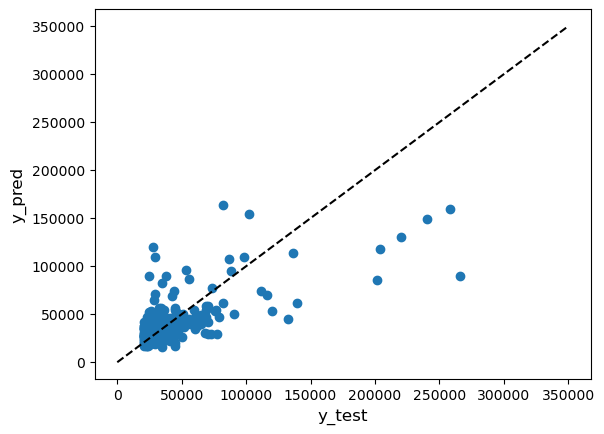

test set performance:  0.4793314726330624


<Figure size 640x480 with 0 Axes>

In [11]:
from joblib import dump, load
from numpy import loadtxt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

# load the dataset
dataset = pd.read_csv('1000random.csv')
#dataset = pd.read_csv('with_author_details.csv')
#dataset['author_type'] = dataset.author_type.apply(lambda x: 1 if x=='User' else 0)
X = dataset.drop(['stars'] , axis =1)
y = dataset.stars

#s = StandardScaler()
#X = s.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf = GradientBoostingRegressor(verbose = 1, n_estimators = 500,max_depth=2,random_state=42)
clf.fit(X_train, y_train)

test_score = r2_score(y_test, clf.predict(X_test))
plt.scatter(y_test, clf.predict(X_test))
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
xlim = [0, 350000]
ylim = [0, 350000]
plt.plot(xlim, ylim, '--k')
plt.savefig('gradientBoost.png')
plt.show()

print("test set performance: ", test_score)
